Lab 4

Eli Chesnut
Kiersten Wener

In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# importing data

df = pd.read_csv('acs2017_census_tract_data.csv') #can infer col names
df.head()


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [4]:
nan_count = df.isna().sum()
print(nan_count)

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64


There is a good amount of missing data for some variables but considering how large the data set is, it shouldn't be a problem to remove instead of impute the missing data

In [5]:
dups = df.duplicated()
len(df[dups])

0

No duplicates

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import missingno as mn

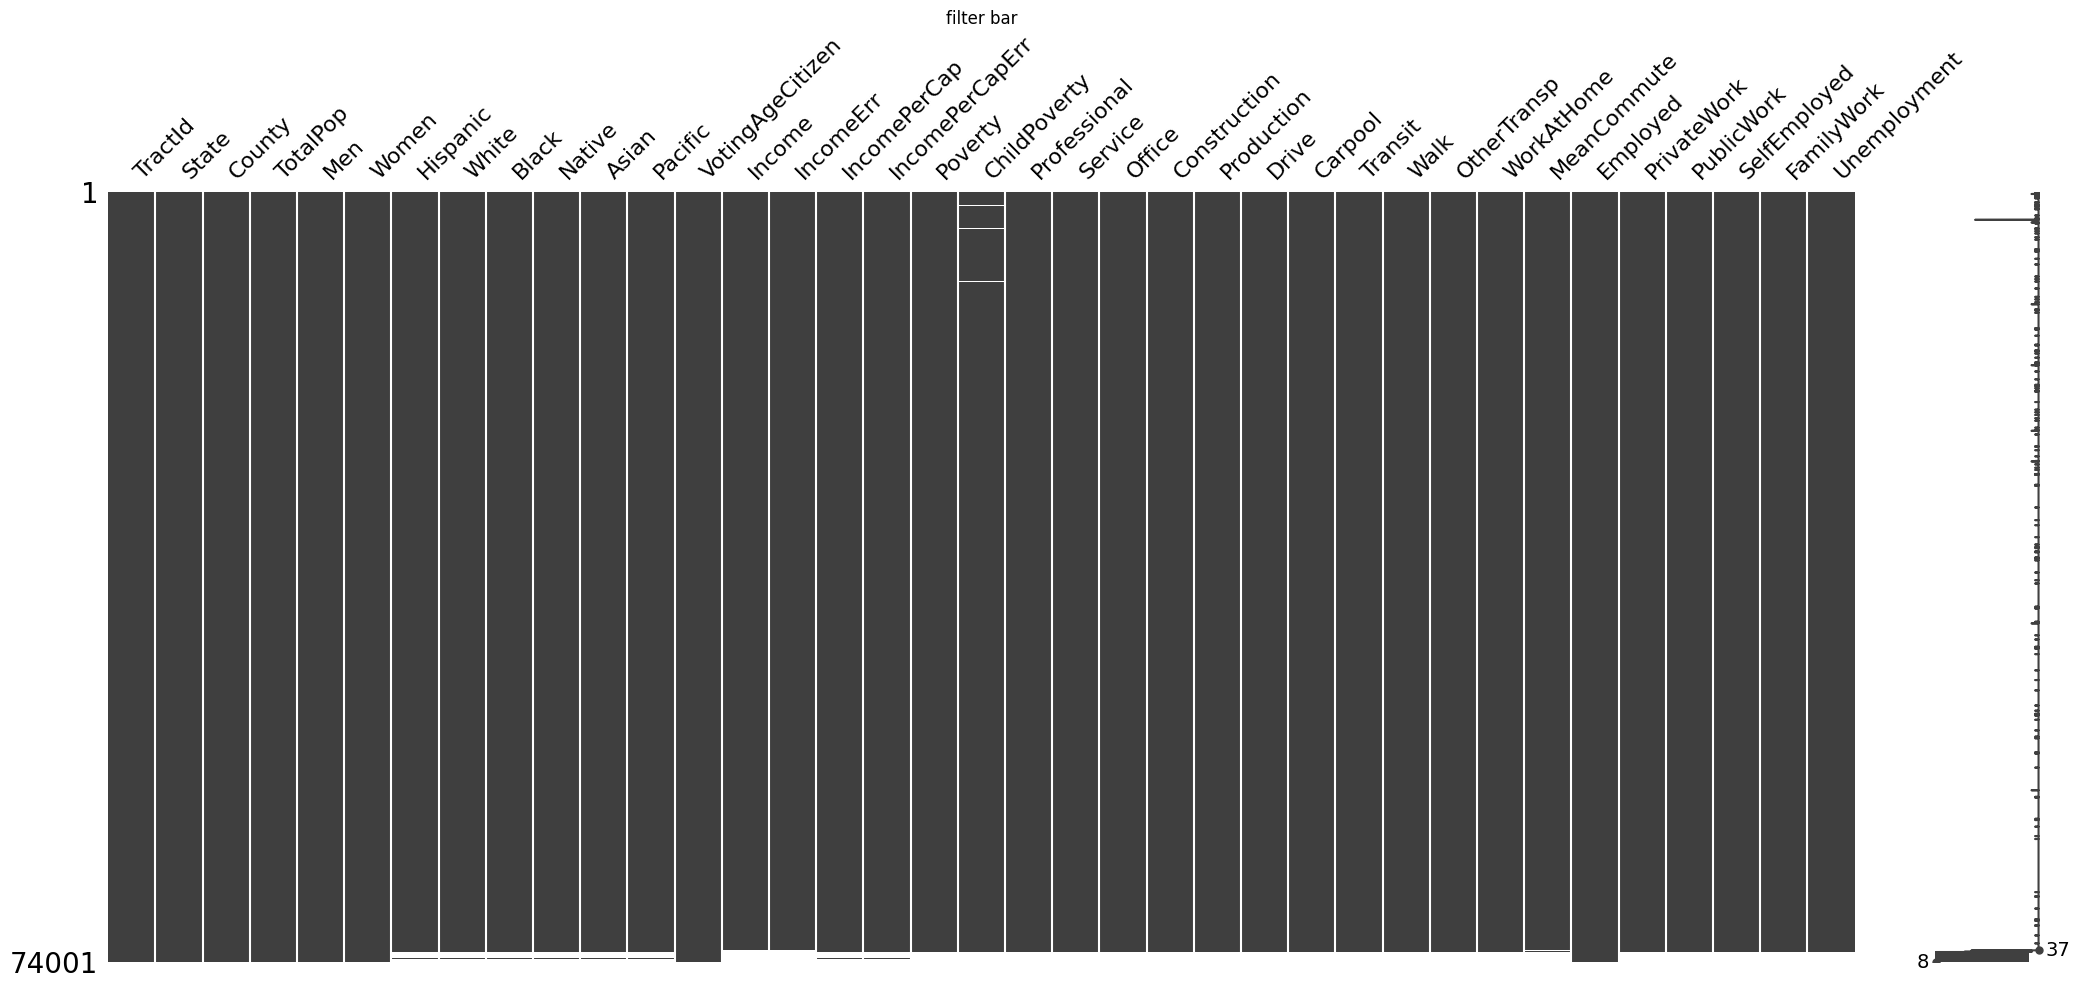

In [7]:
mn.matrix(df.sort_values(by = ['Income', 'ChildPoverty']))
plt.title('filter bar')
plt.show()

Very little amount of data that is missing, so we can get rid of these after more processing


In [8]:
# County to CountyCode
df['County_State'] = df['County'] + '-' + df['State']
df.drop('County', axis=1, inplace=True)
unique_cs = df['County_State'].unique()

cs_mapping = {value: i+1 for i, value in enumerate(unique_cs)}
df['CountyCode'] = df['County_State'].map(cs_mapping)
df.drop('County_State', axis=1, inplace=True)
df.insert(2, 'CountyCode', df.pop('CountyCode'))
df.head()

,TractId,State,CountyCode,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,1,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,1,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,1,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,1,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,1,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


We are keeping the counties. Location is a big factor in regional wealth which will have a strong correlation with the ChildPoverty rate, so it is valuable to keep this data. We are combining state and county in a new column and then using this to create unique codes for every county.

In [9]:

state_mapping = {
    'Alabama': 1, 'Alaska': 2, 'Arizona': 3, 'Arkansas': 4, 'California': 5,
    'Colorado': 6, 'Connecticut': 7, 'Delaware': 8, 'Florida': 9, 'Georgia': 10,
    'Hawaii': 11, 'Idaho': 12, 'Illinois': 13, 'Indiana': 14, 'Iowa': 15,
    'Kansas': 16, 'Kentucky': 17, 'Louisiana': 18, 'Maine': 19, 'Maryland': 20,
    'Massachusetts': 21, 'Michigan': 22, 'Minnesota': 23, 'Mississippi': 24, 'Missouri': 25,
    'Montana': 26, 'Nebraska': 27, 'Nevada': 28, 'New Hampshire': 29, 'New Jersey': 30,
    'New Mexico': 31, 'New York': 32, 'North Carolina': 33, 'North Dakota': 34, 'Ohio': 35,
    'Oklahoma': 36, 'Oregon': 37, 'Pennsylvania': 38, 'Rhode Island': 39, 'South Carolina': 40,
    'South Dakota': 41, 'Tennessee': 42, 'Texas': 43, 'Utah': 44, 'Vermont': 45,
    'Virginia': 46, 'Washington': 47, 'West Virginia': 48, 'Wisconsin': 49, 'Wyoming': 50, 'Puerto Rico': 51
}

df['State'] = df['State'].map(state_mapping)

Changing States to unique numbers

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72542 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72542 non-null  int64  
 1   State             72542 non-null  float64
 2   CountyCode        72542 non-null  int64  
 3   TotalPop          72542 non-null  int64  
 4   Men               72542 non-null  int64  
 5   Women             72542 non-null  int64  
 6   Hispanic          72542 non-null  float64
 7   White             72542 non-null  float64
 8   Black             72542 non-null  float64
 9   Native            72542 non-null  float64
 10  Asian             72542 non-null  float64
 11  Pacific           72542 non-null  float64
 12  VotingAgeCitizen  72542 non-null  int64  
 13  Income            72542 non-null  float64
 14  IncomeErr         72542 non-null  float64
 15  IncomePerCap      72542 non-null  float64
 16  IncomePerCapErr   72542 non-null  float64
 17

Get rid of null values, 72542 left

In [11]:
df.head()
# df.tail()
# df.info()

,TractId,State,CountyCode,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,1.0,1,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,1.0,1,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,1.0,1,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,1.0,1,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,1.0,1,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [12]:
#split
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
df = df.astype(float)
df = df.fillna(value=True)
X = df.drop(columns=['ChildPoverty'])
print(np.max(X))
X = X.to_numpy()
print(np.max(X))
print(X)


y = df['ChildPoverty']
y = y.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)

72153750602.0
72153750602.0
[[1.00102010e+09 1.00000000e+00 1.00000000e+00 ... 4.50000000e+00
  0.00000000e+00 4.60000000e+00]
 [1.00102020e+09 1.00000000e+00 1.00000000e+00 ... 9.00000000e+00
  0.00000000e+00 3.40000000e+00]
 [1.00102030e+09 1.00000000e+00 1.00000000e+00 ... 4.80000000e+00
  7.00000000e-01 4.70000000e+00]
 ...
 [7.21537505e+10 5.10000000e+01 3.22000000e+03 ... 8.00000000e+00
  0.00000000e+00 2.30000000e+01]
 [7.21537506e+10 5.10000000e+01 3.22000000e+03 ... 1.90000000e+00
  0.00000000e+00 2.95000000e+01]
 [7.21537506e+10 5.10000000e+01 3.22000000e+03 ... 5.00000000e+00
  0.00000000e+00 1.79000000e+01]]
(58033, 36)


We split before balancing because we do not want to balance the test data, only the training data. We are doing this because test data is supposed to represent the full data. If we balanced before then the data would not reflect real world data which is usually unbalanced. Balancing could lead to biased results.

EXPLAIN more and have practical application of why: policy, tax payer
just do on trail data, test data is supposed to represent the full data 

In [13]:
#balance data
y_train_quantized = pd.qcut(y_train, q=4, labels=[0, 1, 2, 3])
y_test_quantized = pd.qcut(y_test, q=4, labels=[0,1,2,3])
print(y_train_quantized)

[2, 1, 2, 3, 1, ..., 3, 2, 3, 0, 3]
Length: 58033
Categories (4, int64): [0 < 1 < 2 < 3]


We balance the data with the pandas qcut function. This puts the float data into even buckets so rather than regression we have a classification problem.

In [14]:
# implement two layer perceptron
from scipy.special import expit
import sys
from sklearn.metrics import accuracy_score

class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta



    #====================Mini Batching================
    # def __init__(self, alpha=0.0, decrease_const=0.1, 
    #              decrease_iter = 10, shuffle=True, 
    #              minibatches=1, **kwds):        
    #     # need to add to the original initializer 
    #     self.alpha = alpha
    #     self.decrease_const = decrease_const
    #     self.decrease_iter = decrease_iter
    #     self.shuffle = shuffle
    #     self.minibatches = minibatches
    #     # but keep other keywords
    #     super().__init__(**kwds)



    @staticmethod
    def _encode_labels(y): 
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2


    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    

In [15]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        # print('X', X.shape) #=============wrong sizes leading to all nan
        # print('W1', W1.shape)
        # print('W2', W2.shape)
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3


    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        # print('y',Y_enc.shape)
        # V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V2 = (A3-Y_enc) #cross entropy
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        
        # print('v1',V1.shape) #=========================================================
        gradb2 = np.sum(V2, axis=1).reshape((-1,1)) #error happens here when trying to reshape
        gradb1 = np.sum(V1, axis=1).reshape((-1,1)) 
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2 

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2) ##not a number
        y_pred = np.argmax(A3, axis=0)
        
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        print(y)
        X_data, y_data = X.copy(), y.copy()
        Y_enc =  self._encode_labels(y)
        # Y_enc = y 
        # print('y', Y_enc.shape[0])
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        #print("initialized")

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)
            #print("appended")

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc, #something with get gradient
                                              W1=self.W1, W2=self.W2)
            
            #print("gradient got")
            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            

        return self

In [16]:


nn = TwoLayerPerceptron(n_hidden=40, C=0.1, epochs=200, eta=0.01, random_state=1)

print("test")
nn.fit(X_train, y_train_quantized, print_progress=50)
yhat = nn.predict(X_test)
# print(np.max(X_train))
print('yhat', yhat) #y hat doesn't have any real outputs, its all zero and idk why
# print('y_test', y_test_quantized)
print('Accuracy', accuracy_score(y_test_quantized,yhat))
# print("test")

test
[2, 1, 2, 3, 1, ..., 3, 2, 3, 0, 3]
Length: 58033
Categories (4, int64): [0 < 1 < 2 < 3]


Epoch: 200/200

yhat [3 3 3 ... 3 3 3]
Accuracy 0.24936246467709697


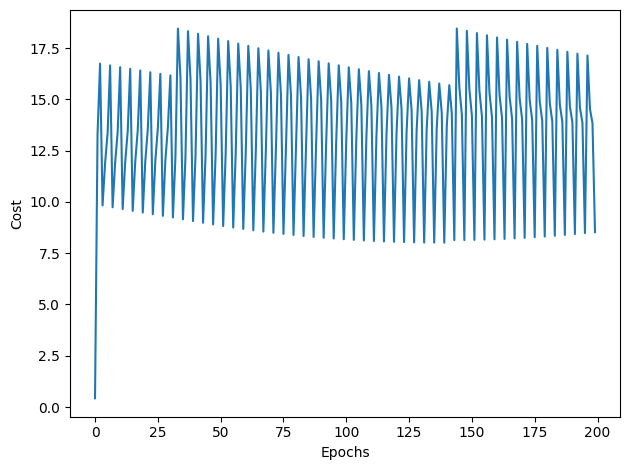

In [17]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

Normalize the data 

In [19]:
nn_norm = TwoLayerPerceptron(n_hidden=40, C=0.1, epochs=200, eta=0.01, random_state=1)

print("test")
nn_norm.fit(X_train_norm, y_train_quantized, print_progress=50)
yhat_norm = nn_norm.predict(X_test_norm)
# print(np.max(X_train))
print('yhat', yhat) 
# print('y_test', y_test_quantized)
print('Accuracy', accuracy_score(y_test_quantized,yhat_norm))
# print("test")

test
[2, 1, 2, 3, 1, ..., 3, 2, 3, 0, 3]
Length: 58033
Categories (4, int64): [0 < 1 < 2 < 3]


Epoch: 200/200

yhat [3 3 3 ... 3 3 3]
Accuracy 0.538700117168654


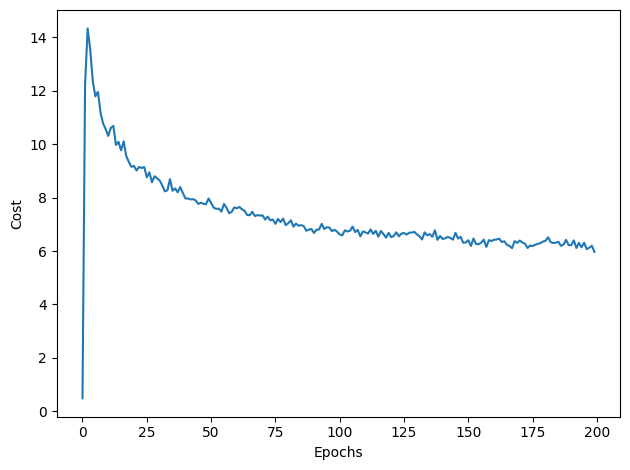

In [20]:
plt.plot(range(len(nn_norm.cost_)), nn_norm.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [21]:
class twoLayerB(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [22]:
class TLPMiniBatch(twoLayerB):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                
                
                # simple momentum calculations
                
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self

In [23]:
nn_mb = TLPMiniBatch(alpha=0.001, decrease_const=0.1, decrease_iter=15, minibatches=50,shuffle=True)

print("test")
nn_mb.fit(X_train, y_train_quantized, print_progress=50)
yhat = nn_mb.predict(X_test)
# print(np.max(X_train))
print('yhat', yhat) #y hat doesn't have any real outputs, its all zero and idk why
# print('y_test', y_test_quantized)
print('Accuracy', accuracy_score(y_test_quantized,yhat))
# print("test")

test


Epoch: 500/500

yhat [0 0 0 ... 0 0 0]
Accuracy 0.25094768764215314
